1. Link Services Internally (Included column for non local)

In [1]:
import csv

traversal_time_arr = [0, 13, 18, 27, 42, 72] #CCG -> DR -> BA -> AND -> BOR -> VR
station_map = {
    "CCG": 0,
    "DR" : 1,
    "BA" : 2,
    "AND": 3,
    "BOR": 4,
    "VR" : 5
}

def Augment(od_pairs):
    od_pairs_new = od_pairs.copy()

    for od in od_pairs:
        if od.service_type == "nonlocal": continue
        direction = 1 if station_map[od.destin_stn] > station_map[od.originating_stn] else -1
        # +1 for direction is up
        if direction == 1:
            if od.originating_stn == "CCG" and od.destin_stn != "VR": #Originating at CCG but not till VR
                od_pair = ODPair(
                    sr_num= (od_pairs_new[-1].sr_num + 1),
                    originating_at_time=int(od.destination_time),
                    originating_stn=od.destin_stn,
                    destin_stn="VR",
                    fast_or_slow=od.fast_or_slow,
                    traversal_time=int(traversal_time_arr[5] - traversal_time_arr[station_map[od.destin_stn]]),
                    destination_time=int(od.destination_time + traversal_time_arr[5] - traversal_time_arr[station_map[od.destin_stn]]),
                    service_type = od.service_type,
                    linkedToBefore=od.sr_num,                   #Adding Linking
                    linkedToAfter=None
                )
                od.linkedToAfter=od_pair.sr_num                #Adding Linking

                #Add returning rack
                od_pair2 = ODPair(
                    sr_num = (od_pairs_new[-1].sr_num + 2),
                    originating_at_time=int(od.originating_at_time + traversal_time_arr[5]),
                    originating_stn="VR",
                    destin_stn="CCG",
                    fast_or_slow=od.fast_or_slow,
                    traversal_time=int(traversal_time_arr[5]),
                    destination_time=int(od.originating_at_time + 2*traversal_time_arr[5]),
                    service_type = od.service_type,
                    linkedToBefore=od_pair.sr_num,                   #Adding Linking
                    linkedToAfter=None
                )

                od_pair.linkedToAfter = od_pair2.sr_num
                od_pairs_new.append(od_pair)
                od_pairs_new.append(od_pair2)

            elif od.destin_stn == "VR" and od.originating_stn != "CCG": #Destination at VR but not from CCG
                od_pair = ODPair(
                    sr_num= (od_pairs_new[-1].sr_num + 1),
                    originating_at_time=int(od.originating_at_time - traversal_time_arr[station_map[od.originating_stn]]),
                    originating_stn="CCG",
                    destin_stn=od.originating_stn,
                    fast_or_slow=od.fast_or_slow,
                    traversal_time=int(traversal_time_arr[5] - traversal_time_arr[station_map[od.destin_stn]]),
                    destination_time=int(od.originating_at_time),
                    service_type = od.service_type,
                    linkedToBefore = None,                  #Adding Linking
                    linkedToAfter = od.sr_num
                )
                od.linkedToBefore = od_pair.sr_num               #Adding Linking
                od.linkedToAfter = od_pairs_new[-1].sr_num + 2

                #Add returning rack
                od_pair2 = ODPair(
                    sr_num= (od_pairs_new[-1].sr_num + 2),
                    originating_at_time=int(od.destination_time),
                    originating_stn="VR",
                    destin_stn="CCG",
                    fast_or_slow=od.fast_or_slow,
                    traversal_time=int(traversal_time_arr[5]),
                    destination_time=int(od.destination_time + traversal_time_arr[5]),
                    service_type = od.service_type,
                    linkedToBefore = od.sr_num,                  #Adding Linking
                    linkedToAfter = None
                )
                od_pairs_new.append(od_pair)
                od_pairs_new.append(od_pair2)

            elif od.originating_stn != "CCG" and od.destin_stn != "VR": #Neither originating at CCG and nor destination at VR
                od_pair = ODPair(
                    sr_num= (od_pairs_new[-1].sr_num + 1),
                    originating_at_time=int(od.destination_time),
                    originating_stn=od.destin_stn,
                    destin_stn="VR",
                    fast_or_slow=od.fast_or_slow,
                    traversal_time=int(traversal_time_arr[5] - traversal_time_arr[station_map[od.destin_stn]]),
                    destination_time=int(od.destination_time + traversal_time_arr[5] - traversal_time_arr[station_map[od.destin_stn]]),
                    service_type = od.service_type,
                    linkedToBefore = od.sr_num,                  #Adding Linking
                    linkedToAfter = None
                )

                od_pair2 = ODPair(
                    sr_num = (od_pairs_new[-1].sr_num + 2),
                    originating_at_time=int(od.originating_at_time - traversal_time_arr[station_map[od.originating_stn]]),
                    originating_stn="CCG",
                    destin_stn=od.originating_stn,
                    fast_or_slow=od.fast_or_slow,
                    traversal_time=int(traversal_time_arr[5] - traversal_time_arr[station_map[od.destin_stn]]),
                    destination_time=int(od.originating_at_time),
                    service_type = od.service_type,
                    linkedToBefore = None,                  #Adding Linking
                    linkedToAfter = od.sr_num
                )

                #Add returning rack
                od_pair3 = ODPair(
                    sr_num= (od_pairs_new[-1].sr_num + 3),
                    originating_at_time=int(od.destination_time + traversal_time_arr[5] - traversal_time_arr[station_map[od.destin_stn]]),
                    originating_stn="VR",
                    destin_stn="CCG",
                    fast_or_slow=od.fast_or_slow,
                    traversal_time=int(traversal_time_arr[5]),
                    destination_time=int(od.destination_time + 2*traversal_time_arr[5] - traversal_time_arr[station_map[od.destin_stn]]),
                    service_type = od.service_type,
                    linkedToBefore = od_pair.sr_num,                  #Adding Linking
                    linkedToAfter = None
                )
                od_pair.linkedToAfter = od_pair3.sr_num

                od.linkedToBefore = od_pair2.sr_num
                od.linkedToAfter = od_pair.sr_num

                od_pairs_new.append(od_pair)
                od_pairs_new.append(od_pair2)
                od_pairs_new.append(od_pair3)

            else :
                #Add returning rack
                od_pair = ODPair(
                    sr_num= (od_pairs_new[-1].sr_num + 1),
                    originating_at_time=int(od.destination_time),
                    originating_stn="VR",
                    destin_stn="CCG",
                    fast_or_slow=od.fast_or_slow,
                    traversal_time=int(traversal_time_arr[5]),
                    destination_time=int(od.destination_time + traversal_time_arr[5]),
                    service_type = od.service_type,
                    linkedToBefore = od.sr_num,                  #Adding Linking
                    linkedToAfter = None
                )
                od.linkedToAfter=od_pair.sr_num
                od_pairs_new.append(od_pair)


        # -1 for direction is down
        if direction == -1:
            if od.originating_stn == "VR" and od.destin_stn != "CCG": #Originating at VR but not till CCG
                od_pair = ODPair(
                    sr_num= (od_pairs_new[-1].sr_num + 1),
                    originating_at_time=int(od.destination_time),
                    originating_stn=od.destin_stn,
                    destin_stn="CCG",
                    fast_or_slow=od.fast_or_slow,
                    traversal_time=int(traversal_time_arr[station_map[od.destin_stn]]),
                    destination_time=int(traversal_time_arr[station_map[od.destin_stn]] + od.destination_time),
                    service_type = od.service_type,
                    linkedToBefore = od.sr_num,                  #Adding Linking
                    linkedToAfter = None
                )
                od_pairs_new.append(od_pair)
                od.linkedToAfter = od_pair.sr_num
                # Add originating train
                od_pair = ODPair(
                    sr_num= (od_pairs_new[-1].sr_num + 1),
                    originating_at_time=int(od.originating_at_time - traversal_time_arr[5]),
                    originating_stn="CCG",
                    destin_stn="VR",
                    fast_or_slow=od.fast_or_slow,
                    traversal_time=int(traversal_time_arr[5]),
                    destination_time=int(od.originating_at_time),
                    service_type = od.service_type,
                    linkedToBefore = None,                  #Adding Linking
                    linkedToAfter = od.sr_num
                )
                od.linkedToBefore = od_pair.sr_num
                od_pairs_new.append(od_pair)

            elif od.originating_stn != "VR" and od.destin_stn == "CCG": #Not originating at VR but till CCG
                od_pair = ODPair(
                    sr_num= (od_pairs_new[-1].sr_num + 1),
                    originating_at_time=int(od.originating_at_time - traversal_time_arr[5] + traversal_time_arr[station_map[od.originating_stn]]),
                    originating_stn="VR",
                    destin_stn=od.originating_stn,
                    fast_or_slow=od.fast_or_slow,
                    traversal_time=int(traversal_time_arr[5] - traversal_time_arr[station_map[od.originating_stn]]),
                    destination_time=int(od.originating_at_time),
                    service_type = od.service_type,
                    linkedToBefore = None,                  #Adding Linking
                    linkedToAfter = od.sr_num
                )
                #Add originating train
                od_pair2 = ODPair(
                    sr_num= (od_pairs_new[-1].sr_num + 2),
                    originating_at_time=int(od.originating_at_time - 2*traversal_time_arr[5] + traversal_time_arr[station_map[od.originating_stn]]),
                    originating_stn="CCG",
                    destin_stn="VR",
                    fast_or_slow=od.fast_or_slow,
                    traversal_time=int(traversal_time_arr[5]),
                    destination_time=int(od.originating_at_time - traversal_time_arr[5] + traversal_time_arr[station_map[od.originating_stn]]),
                    service_type = od.service_type,
                    linkedToBefore = None,                  #Adding Linking
                    linkedToAfter = od_pair.sr_num
                )
                od_pair.linkedToBefore = od_pair2.sr_num
                od.linkedToBefore = od_pair.sr_num

                od_pairs_new.append(od_pair)
                od_pairs_new.append(od_pair2)

            elif od.originating_stn != "VR" and od.destin_stn != "CCG": #Neither originating at VR and nor destination at CCG
                od_pair = ODPair(
                    sr_num= (od_pairs_new[-1].sr_num + 1),
                    originating_at_time=int(od.originating_at_time - traversal_time_arr[5] + traversal_time_arr[station_map[od.originating_stn]]),
                    originating_stn="VR",
                    destin_stn=od.originating_stn,
                    fast_or_slow=od.fast_or_slow,
                    traversal_time=int(traversal_time_arr[5] - traversal_time_arr[station_map[od.originating_stn]]),
                    destination_time=int(od.originating_at_time),
                    service_type = od.service_type,
                    linkedToBefore = None,                  #Adding Linking
                    linkedToAfter = od.sr_num
                )

                od_pair2 = ODPair(
                    sr_num= (od_pairs_new[-1].sr_num + 2),
                    originating_at_time=int(od.destination_time),
                    originating_stn=od.destin_stn,
                    destin_stn="CCG",
                    fast_or_slow=od.fast_or_slow,
                    traversal_time=int(traversal_time_arr[station_map[od.destin_stn]]),
                    destination_time=int(traversal_time_arr[station_map[od.destin_stn]] + od.destination_time),
                    service_type = od.service_type,
                    linkedToBefore = od.sr_num,                  #Adding Linking
                    linkedToAfter = None
                )

                #Add originating trains
                od_pair3 = ODPair(
                    sr_num= (od_pairs_new[-1].sr_num + 3),
                    originating_at_time=int(od.originating_at_time - 2*traversal_time_arr[5] + traversal_time_arr[station_map[od.originating_stn]]),
                    originating_stn="CCG",
                    destin_stn="VR",
                    fast_or_slow=od.fast_or_slow,
                    traversal_time=int(traversal_time_arr[5]),
                    destination_time=int(od.originating_at_time - traversal_time_arr[5] + traversal_time_arr[station_map[od.originating_stn]]),
                    service_type = od.service_type,
                    linkedToBefore = None,                  #Adding Linking
                    linkedToAfter = od_pair.sr_num
                )
                od_pair.linkedToBefore = od_pair3.sr_num
                od.linkedToBefore = od_pair.sr_num
                od.linkedToAfter = od_pair2.sr_num

                od_pairs_new.append(od_pair)
                od_pairs_new.append(od_pair2)
                od_pairs_new.append(od_pair3)

            else: # Originates at VR end at CCG
                od_pair = ODPair(
                    sr_num= (od_pairs_new[-1].sr_num + 1),
                    originating_at_time=int(od.originating_at_time - traversal_time_arr[5]),
                    originating_stn="CCG",
                    destin_stn="VR",
                    fast_or_slow=od.fast_or_slow,
                    traversal_time=int(traversal_time_arr[5]),
                    destination_time=int(od.originating_at_time),
                    service_type = od.service_type,
                    linkedToBefore = None,                  #Adding Linking
                    linkedToAfter = od.sr_num
                )
                od.linkedToBefore = od_pair.sr_num
                od_pairs_new.append(od_pair)
    return od_pairs_new

def correct_traversal_time(od_pairs):
    for od in od_pairs:
        if od.service_type == "nonlocal": continue
        od.traversal_time = abs(traversal_time_arr[station_map[od.destin_stn]] - traversal_time_arr[station_map[od.originating_stn]])
        od.destination_time = od.originating_at_time + od.traversal_time

def load_odpairs_from_csv(filepath):
    od_pairs = []
    with open(filepath, newline='') as csvfile:
        reader = csv.reader(csvfile)
        rows = list(reader)

        # Skip the first 4 rows
        #data_rows = rows[4:]
        data_rows = rows

        for row in data_rows:
            if not row or not row[0].isdigit():
                continue  # skip blank/dummy rows

            od_pair = ODPair(
                sr_num=int(row[0]),
                originating_at_time=int(row[4]),
                originating_stn=row[5],
                destin_stn=row[6],
                fast_or_slow=row[7],
                traversal_time=int(row[8]),
                destination_time=int(row[4]) + int(row[8]),
                service_type=row[3]
            )
            od_pairs.append(od_pair)
    return od_pairs

class ODPair:
    def __init__(self, sr_num, originating_at_time, originating_stn, destin_stn, fast_or_slow,
                 traversal_time,destination_time, service_type, linkedToBefore=None, linkedToAfter=None, induction=None, stabilizationAt=None):
        self.sr_num = int(sr_num)
        self.originating_at_time = int(originating_at_time)
        self.originating_stn = originating_stn
        self.destin_stn = destin_stn
        self.fast_or_slow = fast_or_slow
        self.traversal_time = int(traversal_time)
        self.destination_time = destination_time
        self.service_type = service_type
        #Incuded for furthur linking the trains
        self.linkedToBefore = linkedToBefore
        self.linkedToAfter = linkedToAfter
        self.induction = induction
        self.stabilizationAt = stabilizationAt

    def __repr__(self):
        return (f"ODPair(SrNum={self.sr_num}, OriginTime={self.originating_at_time}, "
                f"From='{self.originating_stn}', To='{self.destin_stn}', "
                f"Type='{self.fast_or_slow}', Travel={self.traversal_time}, DestiTime={self.destination_time},"
                f" ServiceType={self.service_type}, linkedToBefore={self.linkedToBefore}, linkedToAfter={self.linkedToAfter},"
                f" Induction={self.induction}, StabilizationAt={self.stabilizationAt})")


od_pairs = load_odpairs_from_csv("TimeT_With_nonLocal.csv")
# Adding test Train
od_pair = ODPair(
                  sr_num= (od_pairs[-1].sr_num + 1),
                  originating_at_time=int(450),
                  originating_stn="VR",
                  destin_stn="DR",
                  fast_or_slow="Slow",
                  traversal_time=int(20),
                  destination_time=int(650),
                  service_type = "local",
                  linkedToBefore = None,                  #Adding Linking
                  linkedToAfter = None
                )
od_pairs.append(od_pair)
#WORKS CAN REMOVE THIS ABOVE SERVICE TOO

correct_traversal_time(od_pairs)

#for od in od_pairs:
#  print(od)

od_pairs_new = Augment(od_pairs)

print("New list")
for od in od_pairs_new:
  print(od)

New list
ODPair(SrNum=1, OriginTime=480, From='CCG', To='BA', Type='Fast', Travel=18, DestiTime=498, ServiceType=local, linkedToBefore=None, linkedToAfter=14, Induction=None, StabilizationAt=None)
ODPair(SrNum=2, OriginTime=486, From='CCG', To='BA', Type='Slow', Travel=18, DestiTime=504, ServiceType=local, linkedToBefore=None, linkedToAfter=16, Induction=None, StabilizationAt=None)
ODPair(SrNum=3, OriginTime=500, From='CCG', To='BA', Type='Slow', Travel=18, DestiTime=518, ServiceType=local, linkedToBefore=None, linkedToAfter=18, Induction=None, StabilizationAt=None)
ODPair(SrNum=4, OriginTime=520, From='CCG', To='BA', Type='Fast', Travel=18, DestiTime=538, ServiceType=local, linkedToBefore=None, linkedToAfter=20, Induction=None, StabilizationAt=None)
ODPair(SrNum=5, OriginTime=530, From='CCG', To='BA', Type='Slow', Travel=18, DestiTime=548, ServiceType=local, linkedToBefore=None, linkedToAfter=22, Induction=None, StabilizationAt=None)
ODPair(SrNum=6, OriginTime=540, From='BOR', To='DR'

In [ ]:
import matplotlib.pyplot as plt

def plot_trains(od_pairs):
    # Station order (bottom = CCG → top = VR)
    station_order = ["CCG", "DR", "BA", "AND", "BOR", "VR"]
    station_map = {stn: i for i, stn in enumerate(station_order)}

    plt.figure(figsize=(12,6))

    for od in od_pairs:
        origin_y = station_map.get(od.originating_stn, None)
        dest_y   = station_map.get(od.destin_stn, None)
        if origin_y is None or dest_y is None:
            continue  # skip invalid stations

        # Color logic
        if od.service_type.lower() == "nonlocal":
            color = "green"
        else:
            color = "red" if od.fast_or_slow == "Fast" else "blue"

        # Line
        plt.plot([od.originating_at_time, od.destination_time],
                 [origin_y, dest_y],
                 color=color, lw=1.5, alpha=0.7)

        # Start & end dots
        plt.scatter([od.originating_at_time, od.destination_time],
                    [origin_y, dest_y],
                    color=color, s=35, zorder=3)

    # Axis formatting
    plt.yticks(range(len(station_order)), station_order)
    plt.xlabel("Time (minutes from midnight)")
    plt.ylabel("Stations")
    plt.title("Train Services (Fast vs Slow, Local vs Non-local)")

    # Legend
    plt.legend([
        plt.Line2D([],[], color="red"),
        plt.Line2D([],[], color="blue"),
        plt.Line2D([],[], color="green")
    ], ["Fast (Local)", "Slow (Local)", "Non-local"])

    plt.grid(True, ls="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

# ✅ Just call once for each list
plot_trains(od_pairs_new)
plot_trains(od_pairs)


2. Linking Trains form below, and then change their timmings function

In [ ]:
import copy

def changeTime(od_pairs_linked, arr_idx, dep_idx):
    #Changing time of departure Train
    print(arr_idx, dep_idx)
    diff = od_pairs_linked[arr_idx].destination_time - od_pairs_linked[dep_idx].originating_at_time
    print(diff)
    od_pairs_linked[dep_idx].originating_at_time += diff
    od_pairs_linked[dep_idx].destination_time += diff

    #Loop for forward trains
    # Build lookup once outside the loop
    srnum_to_index = {od.sr_num: idx for idx, od in enumerate(od_pairs_linked)}

    while od_pairs_linked[dep_idx].linkedToAfter is not None:
        temp = od_pairs_linked[dep_idx].linkedToAfter  # this is SrNum
        next_idx = srnum_to_index[temp]                # safe lookup
        od_pairs_linked[next_idx].originating_at_time += diff
        od_pairs_linked[next_idx].destination_time += diff
        dep_idx = next_idx

#NOTE  HERE departures contains index starting from 0, & linkedToBefore and linkedToAfter gives SrNum of the trains!!!!!!!!!!!
def linkFromBottom(od_pairs_new):
    od_pairs_linked = copy.deepcopy(od_pairs_new)
    departures = [i for i, od in enumerate(od_pairs_linked) if od.originating_stn == "CCG" and od.service_type == "local"] #[0, 1, 2, 3, 4, 7, 24, 25, 28, 30, 33]
    arrivals   = [i for i, od in enumerate(od_pairs_linked) if od.destin_stn == "CCG" and od.service_type == "local" ] #[8, 9, 13, 15, 17, 19, 21, 23, 26, 27, 32]

    for i, arr_idx in enumerate(arrivals):
        if arr_idx == -1:  # skip if already used
            continue

        for j, dep_idx in enumerate(departures):
            if departures[j]==-1: continue

            arrival_time = od_pairs_linked[arr_idx].destination_time
            departure_time = od_pairs_linked[dep_idx].originating_at_time

            if (od_pairs_linked[arr_idx].service_type == od_pairs_linked[dep_idx].service_type) and (od_pairs_linked[arr_idx].fast_or_slow == od_pairs_linked[dep_idx].fast_or_slow) and abs(arrival_time - departure_time) <= 20:
                print("Found you!")
                changeTime(od_pairs_linked, arr_idx, dep_idx)

                departures[j] = -1
                arrivals[i] = -1
                break

    return od_pairs_linked

od_pairs_linked = linkFromBottom(od_pairs_new)

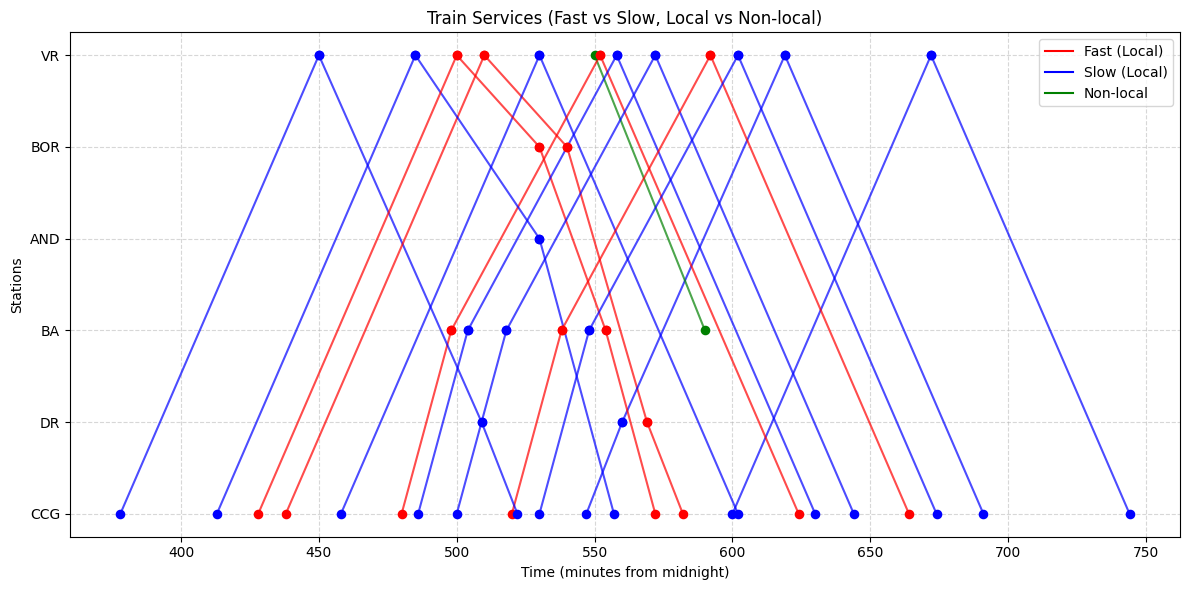

NameError: name 'od_pairs_linked' is not defined

In [2]:
import matplotlib.pyplot as plt

def plot_trains(od_pairs):
    # Station order (bottom = CCG → top = VR)
    station_order = ["CCG", "DR", "BA", "AND", "BOR", "VR"]
    station_map = {stn: i for i, stn in enumerate(station_order)}

    plt.figure(figsize=(12,6))

    for od in od_pairs:
        origin_y = station_map.get(od.originating_stn, None)
        dest_y   = station_map.get(od.destin_stn, None)
        if origin_y is None or dest_y is None:
            continue  # skip invalid stations

        # Color logic
        if od.service_type.lower() == "nonlocal":
            color = "green"
        else:
            color = "red" if od.fast_or_slow == "Fast" else "blue"

        # Line
        plt.plot([od.originating_at_time, od.destination_time],
                 [origin_y, dest_y],
                 color=color, lw=1.5, alpha=0.7)

        # Start & end dots
        plt.scatter([od.originating_at_time, od.destination_time],
                    [origin_y, dest_y],
                    color=color, s=35, zorder=3)

    # Axis formatting
    plt.yticks(range(len(station_order)), station_order)
    plt.xlabel("Time (minutes from midnight)")
    plt.ylabel("Stations")
    plt.title("Train Services (Fast vs Slow, Local vs Non-local)")

    # Legend
    plt.legend([
        plt.Line2D([],[], color="red"),
        plt.Line2D([],[], color="blue"),
        plt.Line2D([],[], color="green")
    ], ["Fast (Local)", "Slow (Local)", "Non-local"])

    plt.grid(True, ls="--", alpha=0.5)
    plt.tight_layout()
    plt.show()
# Call the plotting function
plot_trains(od_pairs_new)
plot_trains(od_pairs_linked)

3.